<h1>Laptop Price Predictor</h1>

In [545]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [546]:
data = pd.read_csv('laptop_data.csv')
data

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


<h1>Preparación del dataset</h1>

In [547]:
data.loc[data.Price > 0, 'Price'] = data.Price / 90.59

data

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,787.931154
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,528.706515
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,338.183022
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,1492.386974
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1060.777216
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,375.236119
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,881.628436
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,134.685065
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,449.342312


In [548]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [549]:
data.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [550]:
data.drop(columns=['Unnamed: 0'],axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [551]:
data['Ram'] = data['Ram'].str.replace('GB','')
data['Weight'] = data['Weight'].str.replace('kg','')
data['Ram'] = data['Ram'].astype('int32')
data['Weight'] = data['Weight'].astype('float32')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


In [552]:
data['Ips'] = data['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
data['TouchScreen'] = data['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)


In [553]:
#Buscamos los dígitos de la resolución y seguidamente los mutiplicamos para obtener resolución total
data['ScreenResolution'] = data['ScreenResolution'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x: int(x[0])*int(x[1])).astype('int64')
data

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Ips,TouchScreen
0,Apple,Ultrabook,13.3,4096000,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,787.931154,1,0
1,Apple,Ultrabook,13.3,1296000,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,528.706515,0,0
2,HP,Notebook,15.6,2073600,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,338.183022,0,0
3,Apple,Ultrabook,15.4,5184000,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,1492.386974,1,0
4,Apple,Ultrabook,13.3,4096000,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1060.777216,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,2073600,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,375.236119,1,1
1299,Lenovo,2 in 1 Convertible,13.3,5760000,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,881.628436,1,1
1300,Lenovo,Notebook,14.0,1049088,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,134.685065,0,0
1301,HP,Notebook,15.6,1049088,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,449.342312,0,0


Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

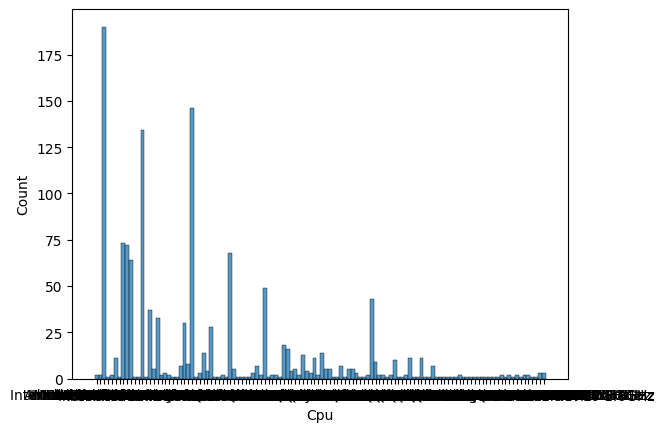

In [554]:
import seaborn as sns

sns.histplot(data=data,x='Cpu')
data['Cpu'].value_counts()

<Axes: xlabel='CpuType', ylabel='Count'>

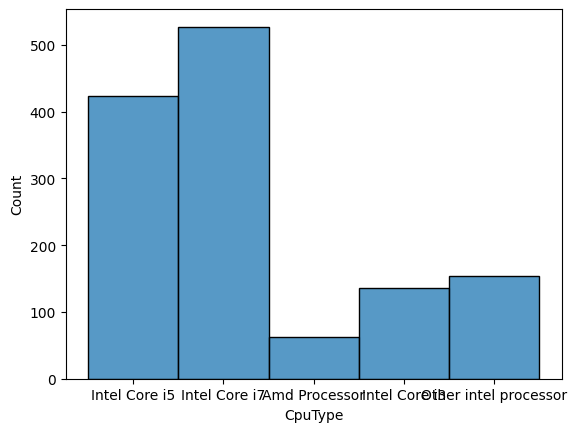

In [555]:
def cpu_type_define(text):
    text = text.split(' ')
    if text[0] == 'Intel':
        if text[2][0] == 'i':
            return text[0]+' '+text[1]+' '+text[2] 
        
        return 'Other intel processor'
    else:
        return 'Amd Processor'

data['CpuType'] = data['Cpu'].apply(cpu_type_define)
data = data.drop(columns=['Cpu'])
sns.histplot(data=data,x='CpuType')

In [556]:
data['Memory'] = data['Memory'].astype(str).replace('\.0', '', regex=True)
data['Memory'] = data['Memory'].str.replace('GB','')
data['Memory'] = data['Memory'].str.replace('TB','000')

def column_type_create(info):
    disc_info = info.split(' ')
    data[disc_info[1]] = 0
        
data['Memory'].apply(column_type_create)

data

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,Ips,TouchScreen,CpuType,SSD,Flash,HDD,Hybrid
0,Apple,Ultrabook,13.3,4096000,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,787.931154,1,0,Intel Core i5,0,0,0,0
1,Apple,Ultrabook,13.3,1296000,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,528.706515,0,0,Intel Core i5,0,0,0,0
2,HP,Notebook,15.6,2073600,8,256 SSD,Intel HD Graphics 620,No OS,1.86,338.183022,0,0,Intel Core i5,0,0,0,0
3,Apple,Ultrabook,15.4,5184000,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,1492.386974,1,0,Intel Core i7,0,0,0,0
4,Apple,Ultrabook,13.3,4096000,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,1060.777216,1,0,Intel Core i5,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,2073600,4,128 SSD,Intel HD Graphics 520,Windows 10,1.80,375.236119,1,1,Intel Core i7,0,0,0,0
1299,Lenovo,2 in 1 Convertible,13.3,5760000,16,512 SSD,Intel HD Graphics 520,Windows 10,1.30,881.628436,1,1,Intel Core i7,0,0,0,0
1300,Lenovo,Notebook,14.0,1049088,2,64 Flash Storage,Intel HD Graphics,Windows 10,1.50,134.685065,0,0,Other intel processor,0,0,0,0
1301,HP,Notebook,15.6,1049088,6,1000 HDD,AMD Radeon R5 M330,Windows 10,2.19,449.342312,0,0,Intel Core i7,0,0,0,0


In [561]:
def disc_type(disc, disc_type):
    if disc_type in disc:
        if not '+' in disc:
            return disc.split(' ')[0]
        else:
            disc_array = disc.split('+')
            discGB = [i for i,j in enumerate(disc_array) if j==disc_type]
            return discGB 
    return 0
 
data['SSD'] = data.apply(lambda data: disc_type(data['Memory'],'SSD'),axis=1)
data['Flash'] = data.apply(lambda data: disc_type(data['Memory'],'Flash'),axis=1)
data['HDD'] = data.apply(lambda data: disc_type(data['Memory'],'HDD'),axis=1)
data['Hybrid'] = data.apply(lambda data: disc_type(data['Memory'],'Hybrid'),axis=1)
data = data.drop(columns='Memory')
data

,Company,TypeName,Inches,ScreenResolution,Ram,Gpu,OpSys,Weight,Price,Ips,TouchScreen,CpuType,SSD,Flash,HDD,Hybrid
0,Apple,Ultrabook,13.3,4096000,8,Intel Iris Plus Graphics 640,macOS,1.37,787.931154,1,0,Intel Core i5,128,0,0,0
1,Apple,Ultrabook,13.3,1296000,8,Intel HD Graphics 6000,macOS,1.34,528.706515,0,0,Intel Core i5,0,128,0,0
2,HP,Notebook,15.6,2073600,8,Intel HD Graphics 620,No OS,1.86,338.183022,0,0,Intel Core i5,256,0,0,0
3,Apple,Ultrabook,15.4,5184000,16,AMD Radeon Pro 455,macOS,1.83,1492.386974,1,0,Intel Core i7,512,0,0,0
4,Apple,Ultrabook,13.3,4096000,8,Intel Iris Plus Graphics 650,macOS,1.37,1060.777216,1,0,Intel Core i5,256,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,2073600,4,Intel HD Graphics 520,Windows 10,1.80,375.236119,1,1,Intel Core i7,128,0,0,0
1299,Lenovo,2 in 1 Convertible,13.3,5760000,16,Intel HD Graphics 520,Windows 10,1.30,881.628436,1,1,Intel Core i7,512,0,0,0
1300,Lenovo,Notebook,14.0,1049088,2,Intel HD Graphics,Windows 10,1.50,134.685065,0,0,Other intel processor,0,64,0,0
1301,HP,Notebook,15.6,1049088,6,AMD Radeon R5 M330,Windows 10,2.19,449.342312,0,0,Intel Core i7,0,0,1000,0
